In [1]:
import torch
print(torch.__version__)

2.4.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensor import Tensor
from module import Module
from layers.Linear import Linear
from layers.Convolution import Conv2d

In [3]:
import pickle

with open(r'C:\Users\Camel\CamillaGrad\data\mini-mnist-1000.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
imgs = data['images']

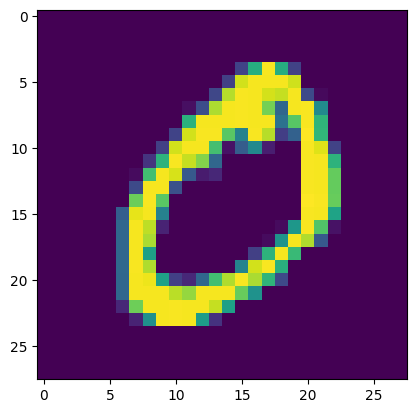

In [5]:
plt.imshow(imgs[0])

In [6]:
from layers.Convolution import MaxPool
from layers.BatchNorm import BatchNorm

In [7]:
imgs[0].shape

(28, 28)

In [8]:
class MnistModel(Module):
    def __init__(self):
        super().__init__()

        self.cnn = Conv2d(1, 16, (3,3))
        self.bn = BatchNorm(16)
        self.max_pool = MaxPool((2,2),2)
        self.linear = Linear(16*13*13, 10)

    def forward(self, x):
        BS = x.shape[0]
        x = self.cnn(x).relu()
        x = self.max_pool(x)
        x = self.bn(x)
        print(f'{x.shape=}')
        x = x.reshape((BS,-1))
        print(f'{x.shape=}')
        out = self.linear(x)
        return out

In [9]:
ims, labs = Tensor(np.array(imgs)[:,np.newaxis]), Tensor(np.array(data['labels']))

In [10]:
idx = np.random.randint(0, 1000, 100)
train_ims = ims[idx]
train_labs = labs[idx]

In [11]:
train_ims = Tensor(train_ims.data)
train_labs = Tensor(train_labs.data)

In [12]:
model = MnistModel()
from Optimizer.Adam import Adam
optimizer = Adam(model.parameters(), learning_rate=0.01)
from losses import CrossEntropyLossWithLogits

criterion = CrossEntropyLossWithLogits()

EPOCHS = 100

history = []
for epoch in range(1, EPOCHS+1):
    # Gradients accumulates, therefore we need to set them to zero at each iteration
    optimizer.zero_grad()
    # Predictions
    predictions = model(train_ims)
    loss = criterion(predictions, train_labs)
    # Compute the gradient
    loss.backward()
    # Update the parameters
    optimizer.step()
    # Record the loss for plotting
    history.append(loss.data)
    print(f"epoch: {epoch} | loss: {loss.data:1.3E}")

x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 1 | loss: 2.302E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 2 | loss: 2.203E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 3 | loss: 2.073E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 4 | loss: 1.889E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 5 | loss: 1.819E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 6 | loss: 1.749E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 7 | loss: 1.613E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 8 | loss: 1.445E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 9 | loss: 1.282E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 10 | loss: 1.132E+00
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 11 | loss: 9.785E-01
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 12 | loss: 8.351E-01
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 13 | loss: 6.927E-01
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
e

c:\Users\Camel\CamillaGrad\src\layers\BatchNorm.py:53: RuntimeWarning: invalid value encountered in power
  dx = dx_hat*(var-self.eps)**-0.5 +  dVar*2*(x - mu)*1/(BS+1) + dMu/BS


epoch: 23 | loss: 6.267E-02
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 24 | loss: 4.417E-02
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 25 | loss: 3.139E-02
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 26 | loss: 2.268E-02
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 27 | loss: 1.657E-02
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 28 | loss: 1.218E-02
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 29 | loss: 9.078E-03
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 30 | loss: 6.857E-03
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 31 | loss: 5.269E-03
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 32 | loss: 4.120E-03
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 33 | loss: 3.280E-03
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 34 | loss: 2.660E-03
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 35 | loss: 2.192E-03
x.shape=(100, 16, 13, 13)
x.shape=(100, 2704)
epoch: 36 | loss: 1.831E-03
x.shape=(1

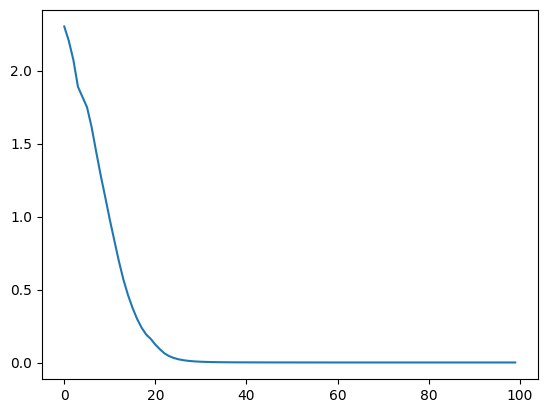

In [17]:
plt.plot(history)